In [1]:
import glob
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Open and visualize 1 hour aggregates
### starting with AOD, QA3 looks reasonable for Jul 31 Day 212 Hour 0000 UTC
# Trying FRP aggregate

In [101]:
dd = '237' #0824-RF0
yyyymmdd = '20190825' #0824-RF0

dd = '239' #0824-RF0
yyyymmdd = '20190827' #0824-RF0

dd = '212'
hh = '06'

In [125]:
FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd}T{hh}00_0_25deg_campex_muri.nc"
# Open the root group
C = xarray.open_dataset(FILE)
C

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    *empty*
Attributes:
    YAML_config:                   grid_settings:\n  gridsize: 0.25\n  projec...
    Yori_version:                  1.7.2
    input_files:                   /tmp/tmph8iy6dzy/grid_muri/GRID.MURI.clavr...
    daily_defn_of_day_adjustment:  False

In [126]:
#for figure labels
file_date_str = FILE.split('/')[-1].replace('.nc', '') 
# Creating lon and lat values corresponding to the dimensions of the data (lon: 1440, lat: 720)
lon = np.linspace(-180, 180, 1440)  # Longitudes from -180 to 180 with 1440 points
lat = np.linspace(-90, 90, 720)     # Latitudes from -90 to 90 with 720 points
lon

array([-180.        , -179.74982627, -179.49965254, ...,  179.49965254,
        179.74982627,  180.        ])

aod_muri_unfiltered
aod_muri_qa1
aod_muri_qa2
aod_muri_qa3
aod_muri_qa4


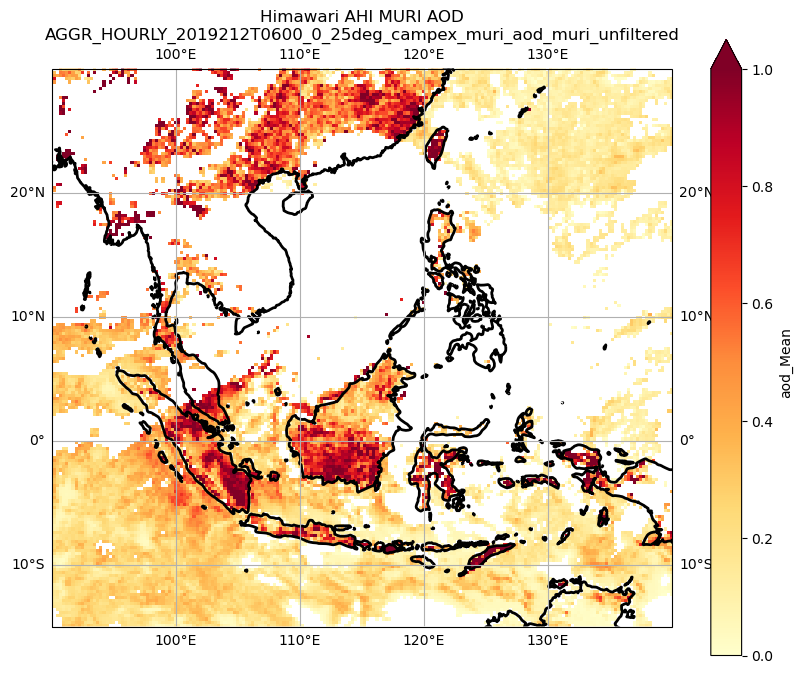

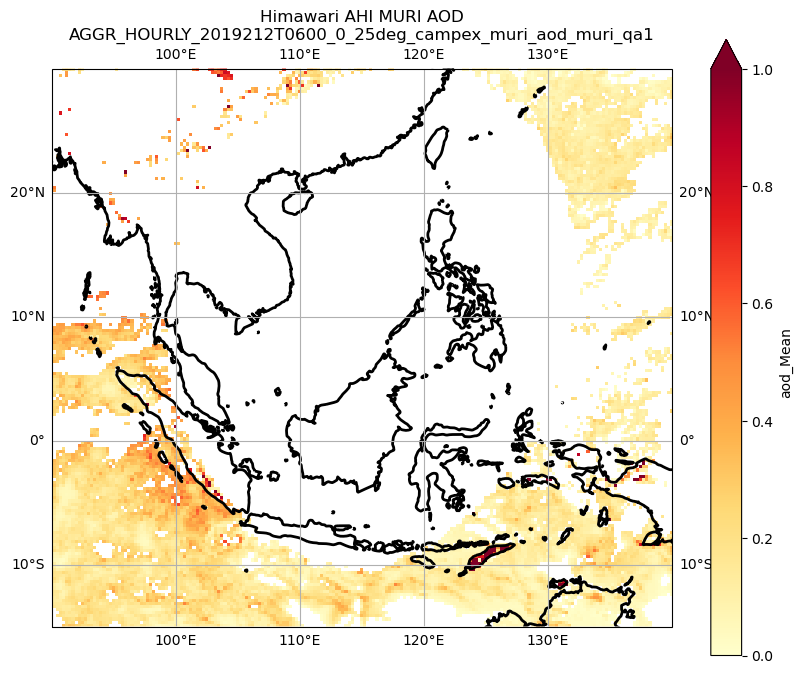

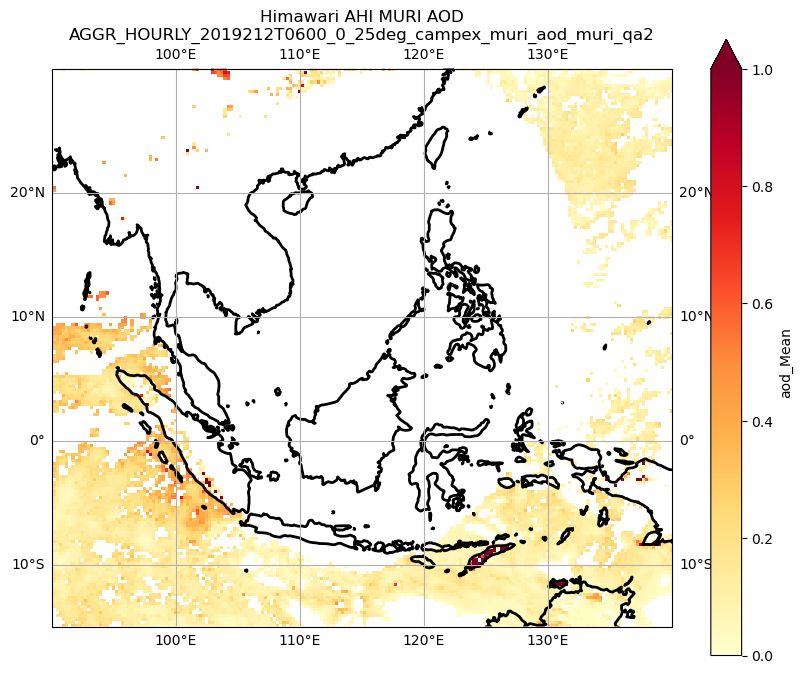

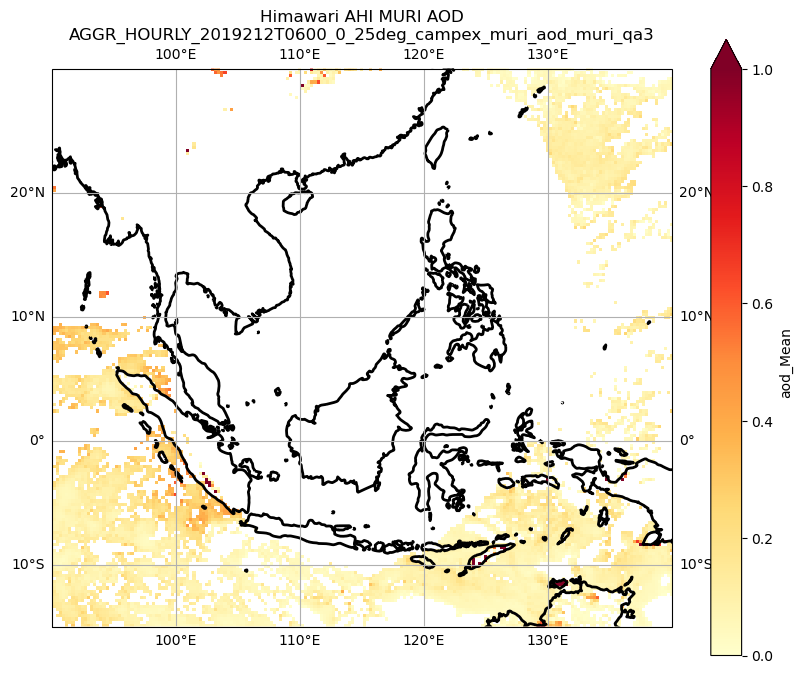

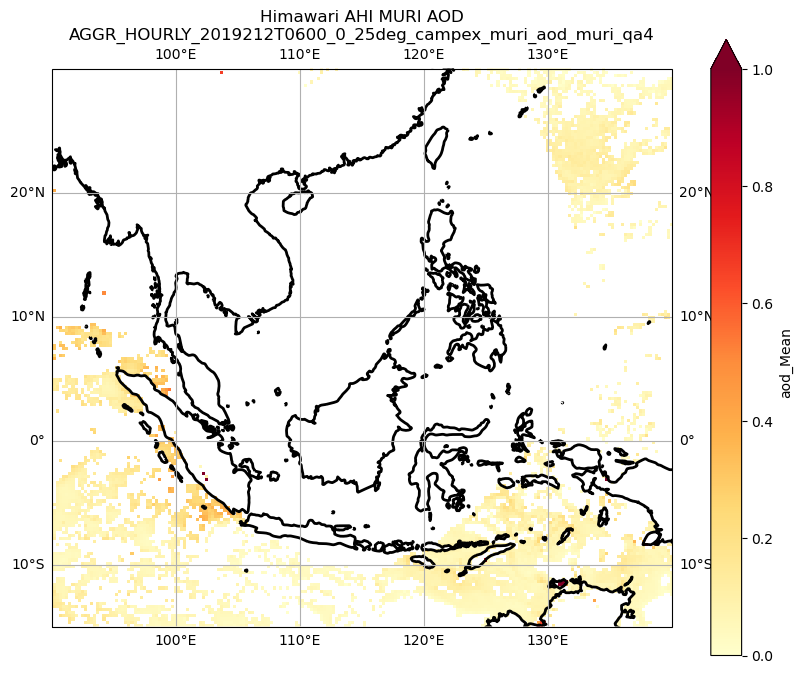

In [104]:
group_name_list = ['aod_muri_unfiltered', 'aod_muri_qa1', 'aod_muri_qa2', 'aod_muri_qa3', 'aod_muri_qa4']

for group_name in group_name_list:
    
    # Open a specific group, e.g., 'group_name'
    print(group_name)
    ds_aod = xarray.open_dataset(FILE, group=group_name)
    # Access an attribute (e.g., description)
    description = C.attrs.get("YAML_config")
    #for figure labels
    file_date_str = FILE.split('/')[-1].replace('.nc', '') 
    #print(ds_aod)
    aod = ds_aod['Mean'].data
    # Create a new DataArray for AOD with lon and lat as coordinates
    aodqa_with_coords = xarray.DataArray(
        data=aod.T,  # AOD data values
        dims=['lat', 'lon'],   # Specify the dimension names
        coords={'lon': lon, 'lat': lat},  # Assign coordinates
        name='aod_Mean'  # You can name the DataArray
    )

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    aodqa_with_coords.where(aodqa_with_coords >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI AOD\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_{group_name}.png',dpi=300)

# Calculate Daily Mean of Hourly mean AOD

aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_unfiltered
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa1
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa2
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa3
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4
aod_muri_qa4


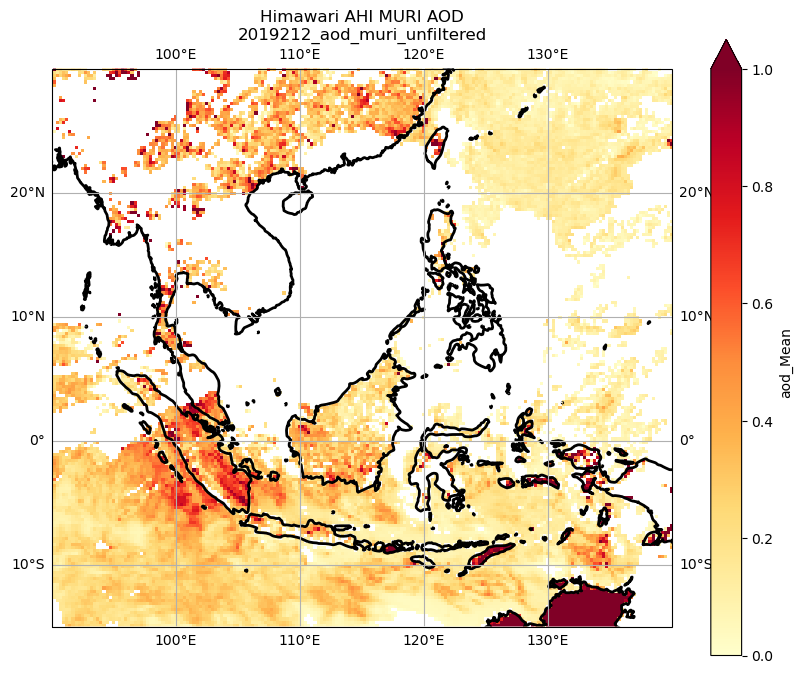

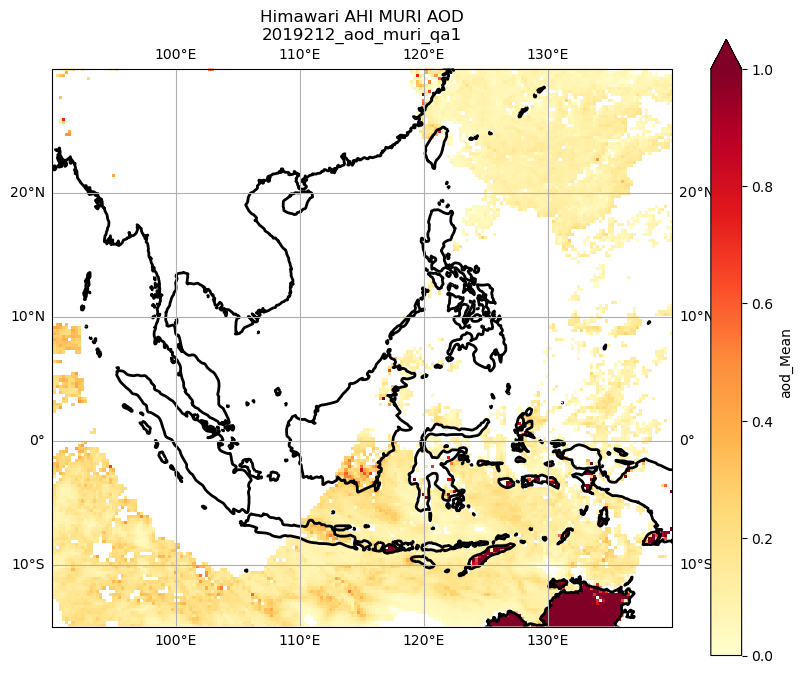

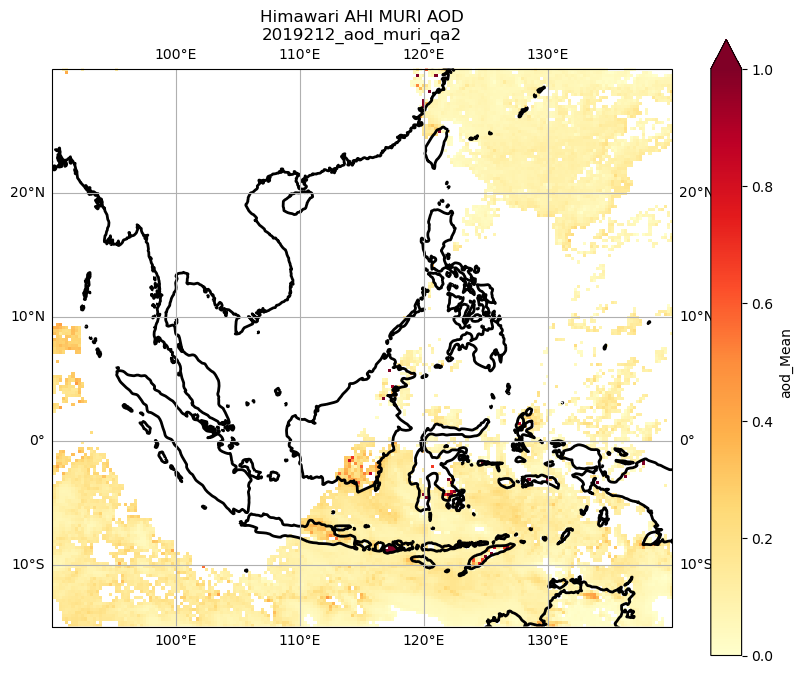

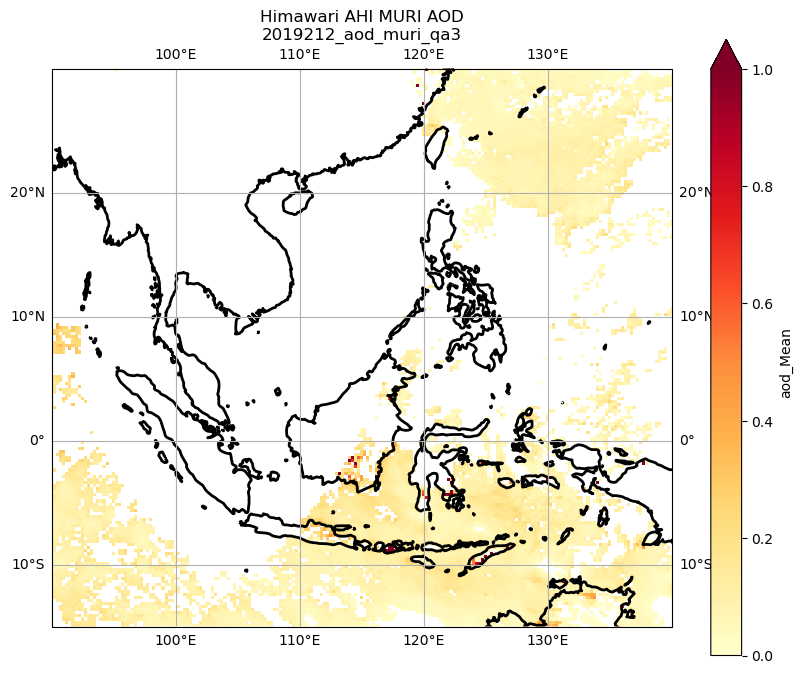

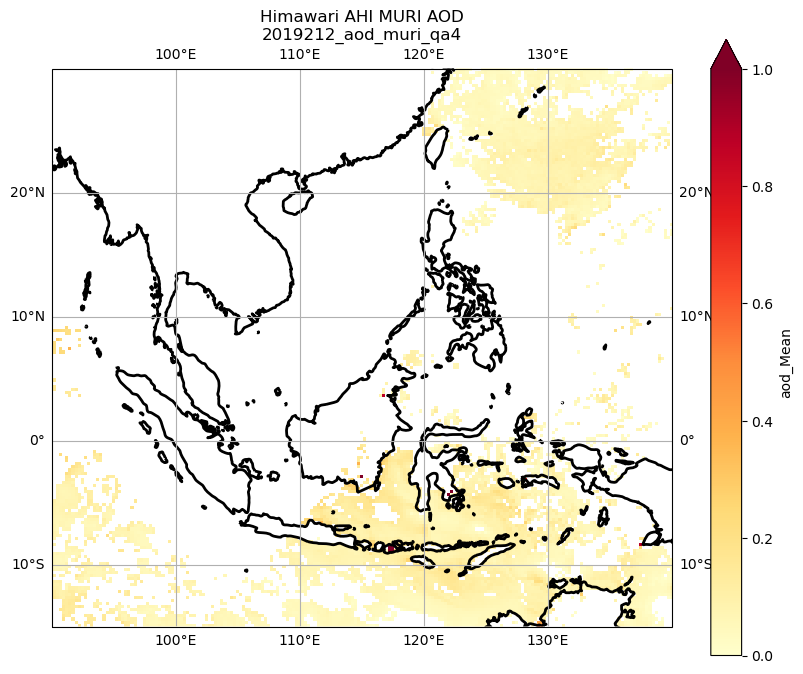

In [123]:
group_name_list = ['aod_muri_unfiltered', 'aod_muri_qa1', 'aod_muri_qa2', 'aod_muri_qa3', 'aod_muri_qa4']
for group_name in group_name_list:
    for i in range(0, 9, 1):
        hh = f"{i:02d}"
        FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd}T{hh}00_0_25deg_campex_muri.nc"
        # Open the root group
        C = xarray.open_dataset(FILE)
        # Open a specific group, e.g., 'group_name'
        print(group_name)
        ds_aod = xarray.open_dataset(FILE, group=group_name)

        #for figure labels
        file_date_str = FILE.split('/')[-1].replace('.nc', '') .split('T')[0].split('_')[2]
        if i>0:
            aod_1 = aod
        aod = ds_aod['Mean']
        if i>0:
            dataarrays = [aod_1, aod]
            da_concat = xarray.concat(dataarrays, dim='new_dim')
    # Calculate the element-wise mean
    mean_aod = da_concat.mean(dim='new_dim', skipna=True)
    mean_aod = mean_aod.data
    aodqa_with_coords = xarray.DataArray(
        data=mean_aod.T,  # AOD data values
        dims=['lat', 'lon'],   # Specify the dimension names
        coords={'lon': lon, 'lat': lat},  # Assign coordinates
        name='aod_Mean'  # You can name the DataArray
    )

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    aodqa_with_coords.where(aodqa_with_coords >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI AOD\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_{group_name}.png',dpi=300)

# Cloud Fraction, hourly

cloud_fraction


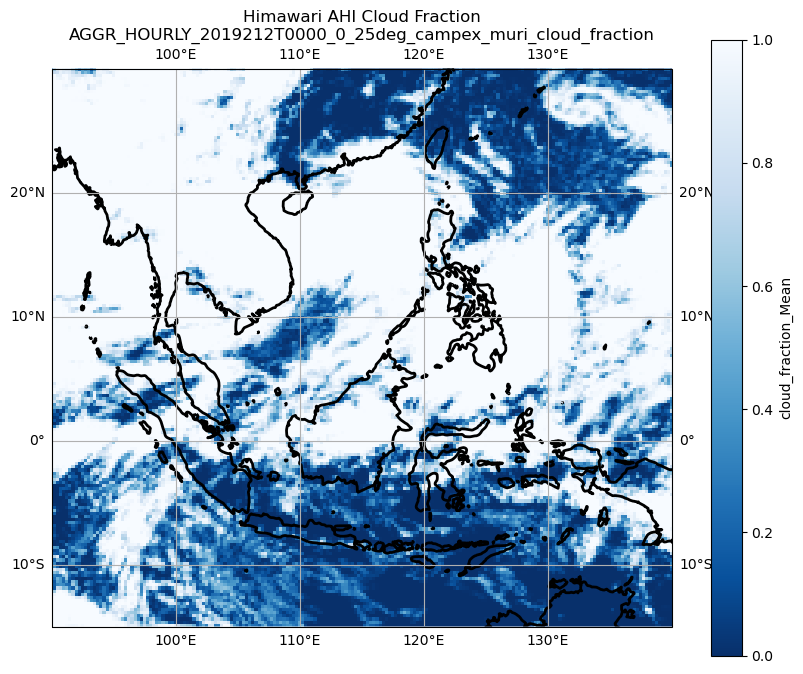

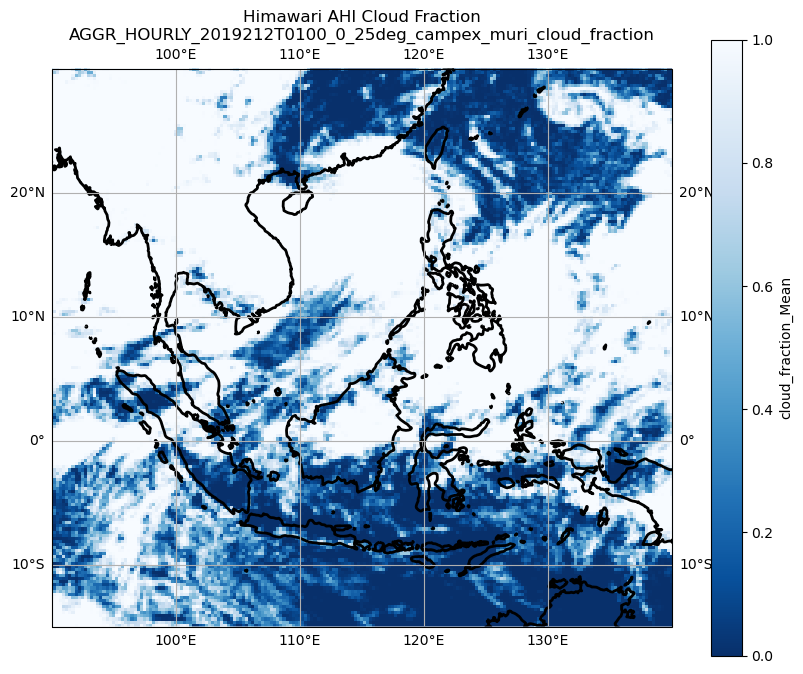

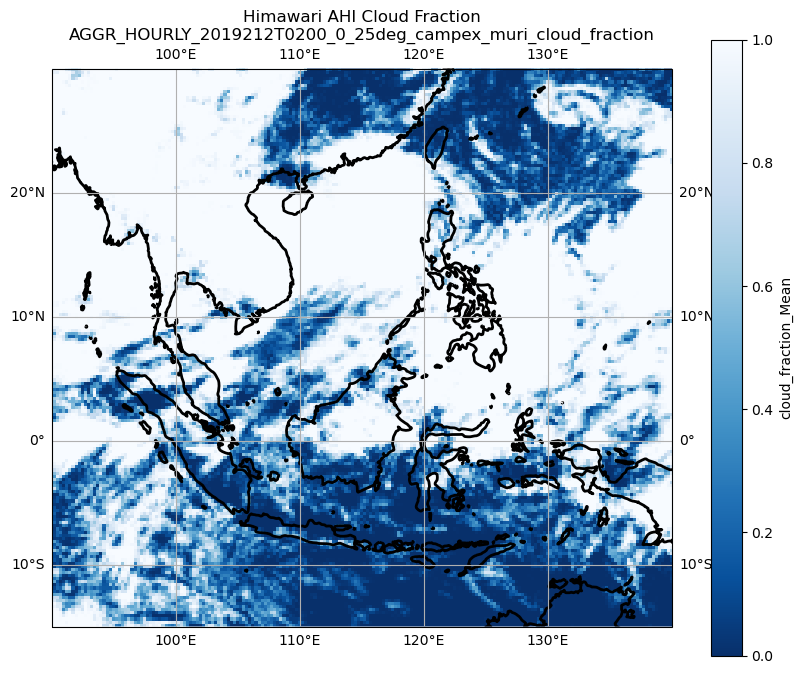

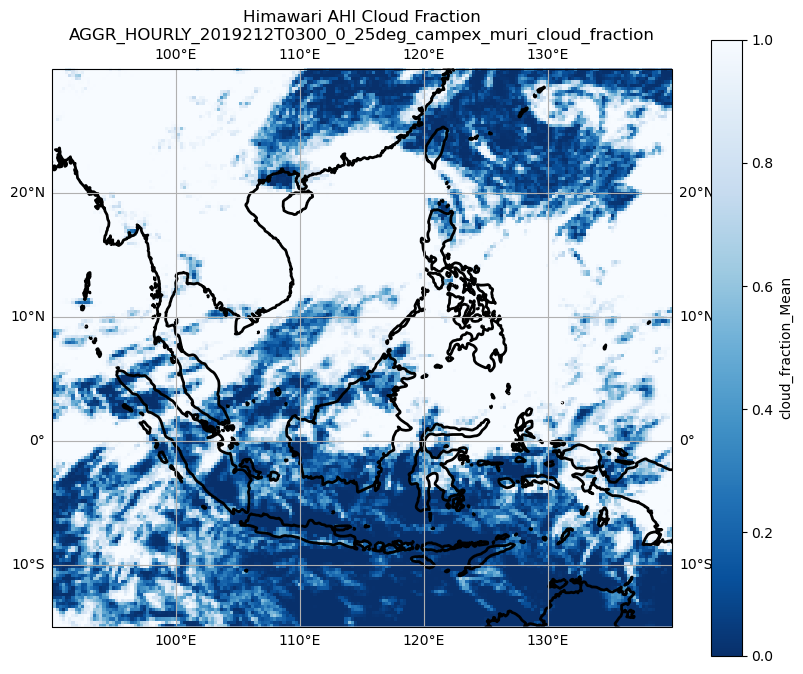

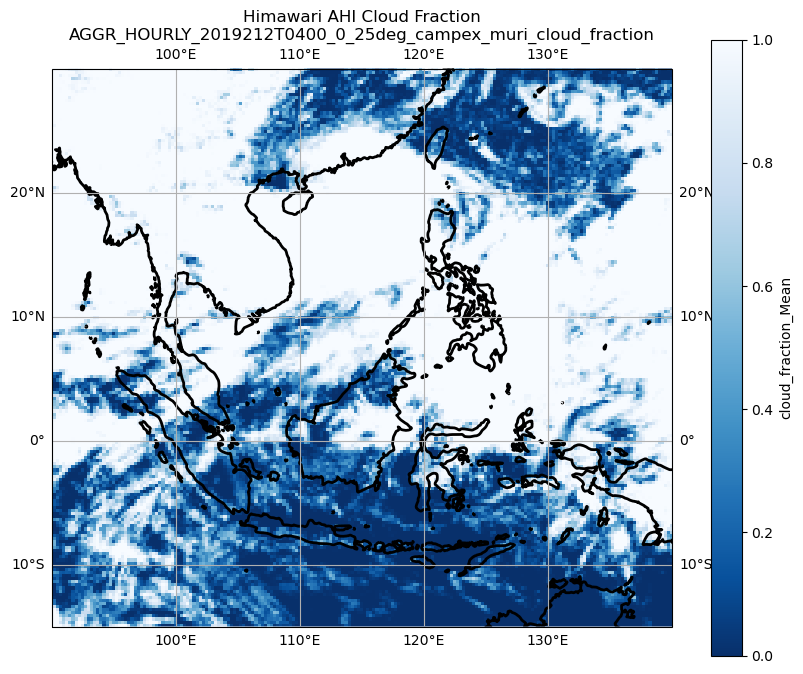

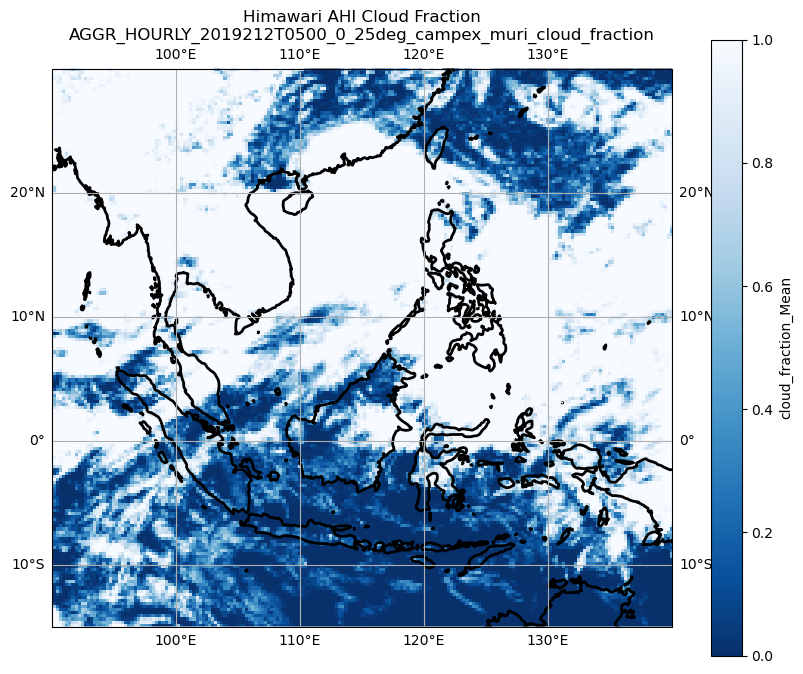

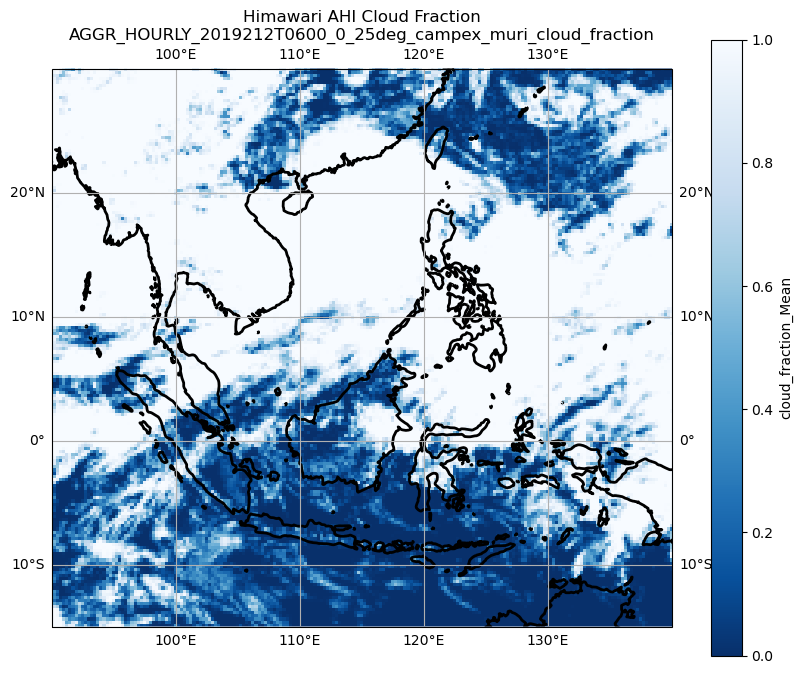

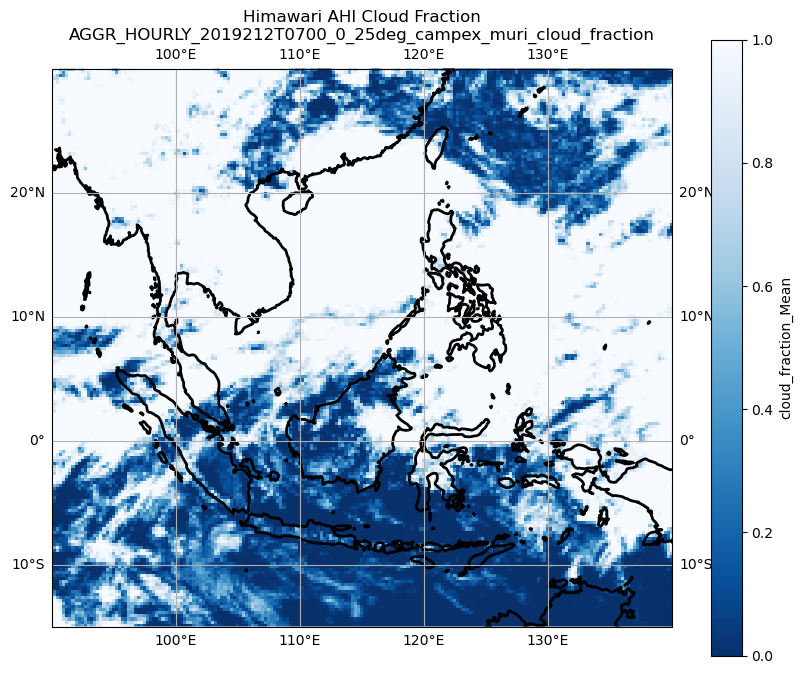

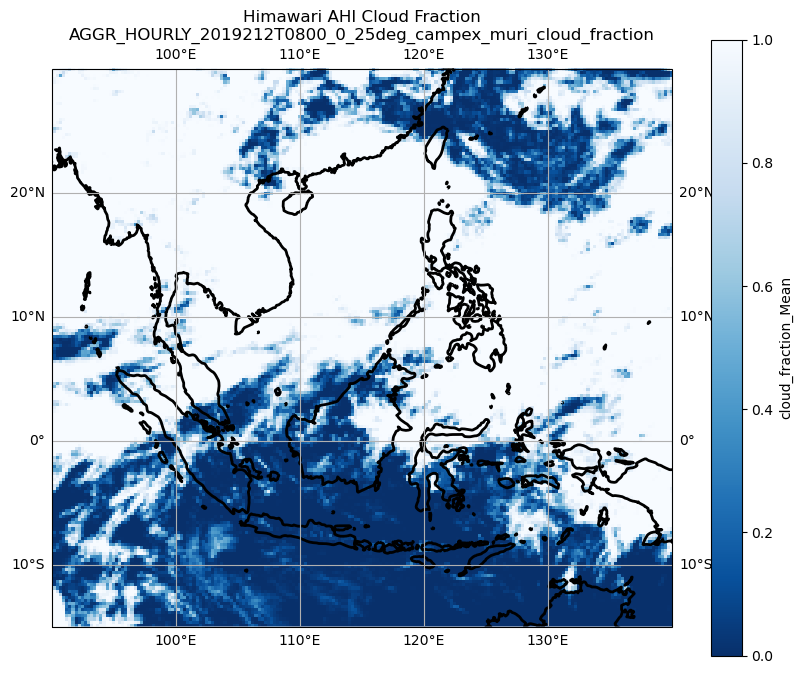

In [145]:
group_name = 'cloud_fraction'
# Open a specific group, e.g., 'group_name'
print(group_name)
for i in range(0, 9, 1):
    hh = f"{i:02d}"
    FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd}T{hh}00_0_25deg_campex_muri.nc"
    ds_cf = xarray.open_dataset(FILE, group=group_name)
    file_date_str = FILE.split('/')[-1].replace('.nc', '') 
    cf = ds_cf.Mean.values
    cf_with_coords = xarray.DataArray(
        data=cf.T,  # Cloud Fraction data values
        dims=['lat', 'lon'],   # Specify the dimension names
        coords={'lon': lon, 'lat': lat},  # Assign coordinates
        name='cloud_fraction_Mean'  # You can name the DataArray
    )

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    cf_with_coords.plot.pcolormesh(vmin=0,vmax=1,cmap='Blues_r')

    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI Cloud Fraction\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_{group_name}.png',dpi=300)

# FRP Aggregate here
### I have a SEA-MC subset of AHI_2019_/ in my local computer. 
### It is located at a AHI_SEA_2019_/ folder. It includes regridded-to-25km coords.

In [95]:
#loop through files
df = []
print(dd)
for filepath in glob.iglob(f'AHI_2019_/f2019{dd}{hh}*.txt'):
    data = pd.read_csv(filepath, skiprows=44).iloc[1:]
    data = data.astype('float')
    data['file'] = os.path.basename(filepath)
    df.append(data)
df = pd.concat(df)

df = df.replace(-9999,np.NaN)
df['Year'] = df['file'].str.slice(1, 5).astype('int')
df['Day'] = df['file'].str.slice(5, 8).astype('int')
df['Hour'] = df['file'].str.slice(8, 10).astype('str')
df['Min'] = df['file'].str.slice(10, 12).astype('str')
df.columns = ['Latitude', 'Longitude', 'Code', 'FRP', 'Fire Size',
           'Fire Temp', 'Line', 'Element', 'Pixel Size', 'Obs BT4',
           'Obs BT11', 'Bkg BT4', 'Bkg BT11', 'SolZen', 'SatZen',
           'RelAzi', 'Eco', 'FD_X', 'FD_Y','file','Year','Day','Hour','Min']
df = df[['Latitude', 'Longitude', 'Code', 'FRP', 'Fire Size',
           'Fire Temp', 'Line', 'Element', 'Pixel Size', 'Obs BT4',
           'Obs BT11', 'Bkg BT4', 'Bkg BT11', 'SolZen', 'SatZen',
           'RelAzi', 'Eco', 'FD_X', 'FD_Y','Year','Day','Hour','Min']]

###    Code: 10 (30) - Processed Fire Pixel (Temporally filtered)
###          11 (31) - Saturated Fire Pixel (Temporally filtered)
###          12 (32) - Cloudy Fire Pixel (Temporally filtered)
###          13 (33) - High Probability Fire Pixel (Temporally filtered)
###          14 (34) - Medium Probability Fire Pixel (Temporally filtered)
###          15 (35) - Low Probability Fire Pixel (Temporally filtered)
###    FRP: Fire Radiative Power [MW] (when available)


df_SEA_code10 = df[df['Code']==10]
df_SEA_code11 = df[df['Code']==11]
df_SEA_code12 = df[df['Code']==12]

212


In [96]:
df_SEA_code10

Latitude  Longitude  Code   FRP  Fire Size  Fire Temp    Line  Element  \
3     63.9882   125.3092  10.0  88.8   199368.0      429.2   179.0   2412.0   
32    33.2596   131.6438  10.0  42.9   131558.0      415.0  1068.0   2342.0   
48    -2.9504   114.0574  10.0  33.8   123888.0      407.1  2909.0   1351.0   
49    -5.3401   119.5155  10.0  55.6     8627.0      620.4  3040.0   1618.0   
50   -11.5444   130.5419  10.0  45.3    80989.0      441.2  3379.0   2202.0   
..        ...        ...   ...   ...        ...        ...     ...      ...   
238  -16.2540   136.7099  10.0  35.3    47012.0      457.1  3629.0   2538.0   
239  -23.4172   148.2281  10.0  35.0     8522.0      577.0  3987.0   3127.0   
243  -29.6777   150.3995  10.0  32.8    34558.0      470.2  4276.0   3205.0   
244  -32.1346   147.3738  10.0  35.0     5089.0      626.9  4385.0   3055.0   
245  -33.7699   122.5477  10.0  43.1     1804.0      793.2  4442.0   1953.0   

     Pixel Size  Obs BT4  ...  SolZen  SatZen  RelAzi   Eco    FD_X    FD_Y  \
3    16981756.0  296.450  ...  55.815  73.941     NaN   2.0  2413.0   180.0   
32    5580016.0  312.888  ...  40.493  40.066     NaN  51.0  2343.0  1069.0   
48    4924009.0  307.684  ...  62.843  31.382     NaN  19.0  1352.0  2910.0   
49    4595477.0  316.111  ...  58.853  25.614     NaN  31.0  1619.0  3041.0   
50    4293259.0  314.932  ...  52.493  18.051     NaN  91.0  2203.0  3380.0   
..          ...      ...  ...     ...     ...     ...   ...     ...     ...   
238   4340463.0  316.072  ...  52.522  19.704     NaN  43.0  2539.0  3630.0   
239   4741817.0  312.459  ...  50.376  28.831     NaN  43.0  3128.0  3988.0   
243   5254123.0  309.493  ...  54.547  36.381     NaN  43.0  3206.0  4277.0   
244   5410410.0  308.010  ...  58.005  38.278     NaN  47.0  3056.0  4386.0   
245   6019416.0  299.054  ...  73.468  44.015     NaN  31.0  1954.0  4443.0   

     Year  Day  Hour  Min  
3    2019  212    00   30  
32   2019  212    00   30  
48   2019  212    00   30  
49   2019  212    00   30  
50   2019  212    00   30  
..    ...  ...   ...  ...  
238  2019  212    00   20  
239  2019  212    00   20  
243  2019  212    00   20  
244  2019  212    00   20  
245  2019  212    00   20  

[229 rows x 23 columns]